In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()

In [2]:
df = pd.read_csv('ice_cream.csv')
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [3]:
df.columns = ['date','production']
df.head()

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.set_index('date', inplace=True)
df.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [6]:
start_date = pd.to_datetime('2010-01-01')
df = df[start_date:]
df.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


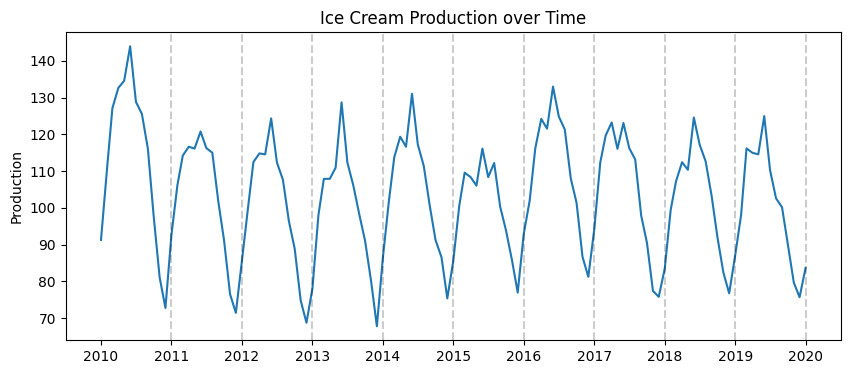

In [7]:
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(df['production'])
plt.title('Ice Cream Production over Time')
plt.ylabel('Production')
for year in range(2011, 2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha = 0.2)

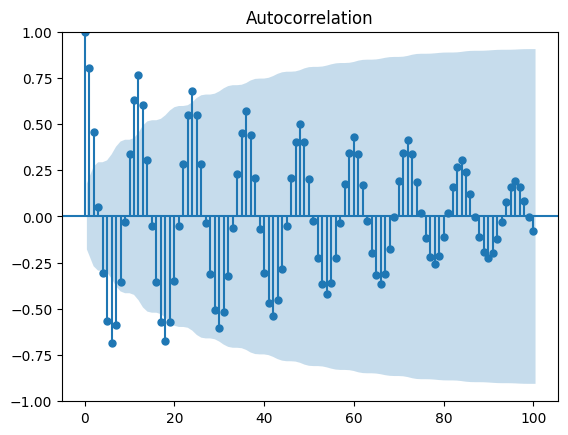

In [8]:
acf_plot = plot_acf(df.production, lags=100)
# here lag is the number of previous data to consider
# same as k in notes
# based on decaying ACF we are dealing with auto regressive process

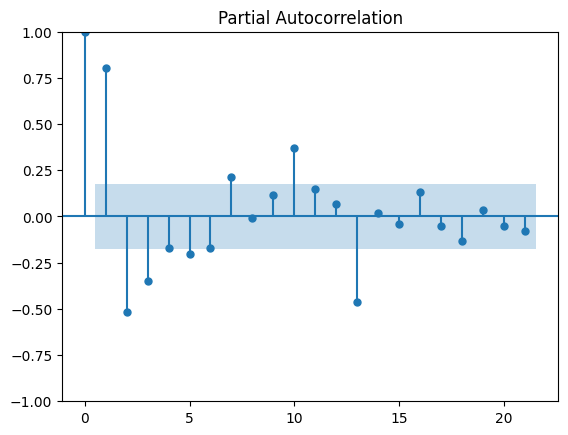

In [9]:
pacf_plot = plot_pacf(df.production)
# blue band is error band in both the charts
# based on graph, we use auto regressive model with lags 1, 2, 3, 10, 13

In [10]:
import yfinance as yf

In [11]:
tickersymbol = 'SPY'

In [12]:
tickerdata = yf.Ticker(tickersymbol)
tickerdata

yfinance.Ticker object <SPY>

In [13]:
tickerdf = tickerdata.history(period='1d', start = '2015-1-1', end='2020-1-1')
tickerdf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2015-01-02 00:00:00-05:00,176.949133,177.377831,175.062854,176.134598,121465900,0.0,0.0,0.0
2015-01-05 00:00:00-05:00,175.054304,175.225781,172.636458,172.953690,169632600,0.0,0.0,0.0
2015-01-06 00:00:00-05:00,173.270938,173.811101,170.501556,171.324661,209151400,0.0,0.0,0.0
2015-01-07 00:00:00-05:00,172.696468,173.811084,172.233481,173.459549,125346700,0.0,0.0,0.0
2015-01-08 00:00:00-05:00,174.917077,176.760483,174.899938,176.537552,147217800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,304.158707,304.206003,303.619395,303.931641,20270000,0.0,0.0,0.0
2019-12-26 00:00:00-05:00,304.329050,305.559062,304.319608,305.549591,30911200,0.0,0.0,0.0
2019-12-27 00:00:00-05:00,306.306463,306.363229,304.925092,305.473846,42528800,0.0,0.0,0.0


In [14]:
tickerdf = tickerdf[['Close']]
tickerdf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,176.134598
2015-01-05 00:00:00-05:00,172.953690
2015-01-06 00:00:00-05:00,171.324661
2015-01-07 00:00:00-05:00,173.459549
2015-01-08 00:00:00-05:00,176.537552


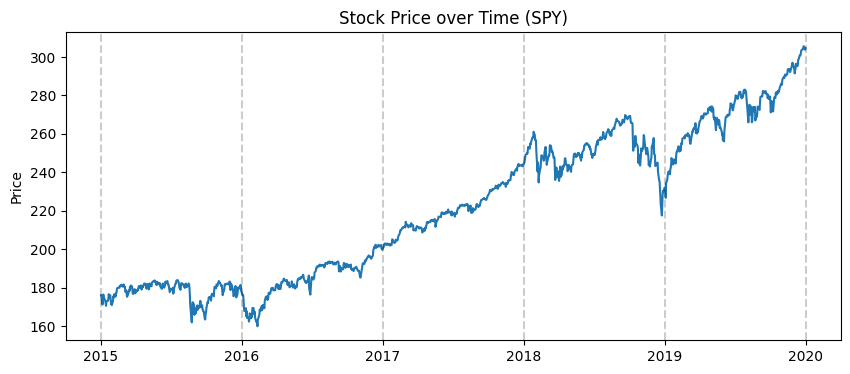

In [15]:
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(tickerdf.Close)
plt.title('Stock Price over Time (%s)' %tickersymbol)
plt.ylabel('Price')
for year in range(2015, 2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle = '--', alpha = 0.2)

In [16]:
diff = tickerdf.Close.values[1 :] - tickerdf.Close.values[:-1]
diff = np.concatenate([[0],diff])
tickerdf['difference'] = diff
tickerdf.head()

C:\Users\MADHU SIDDHARTH S\AppData\Local\Temp\ipykernel_22472\831875157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickerdf['difference'] = diff


,Close,difference
Date,,
2015-01-02 00:00:00-05:00,176.134598,0.000000
2015-01-05 00:00:00-05:00,172.953690,-3.180908
2015-01-06 00:00:00-05:00,171.324661,-1.629028
2015-01-07 00:00:00-05:00,173.459549,2.134888
2015-01-08 00:00:00-05:00,176.537552,3.078003


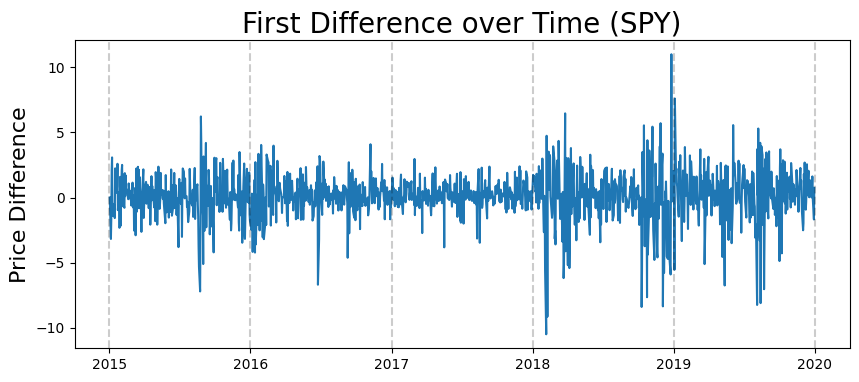

In [17]:
plt.figure(figsize=(10,4))
plt.plot(tickerdf.difference)
plt.title('First Difference over Time (%s)'%tickersymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha = 0.2)

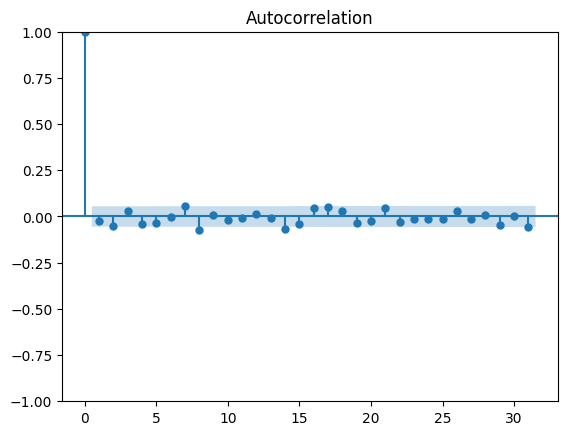

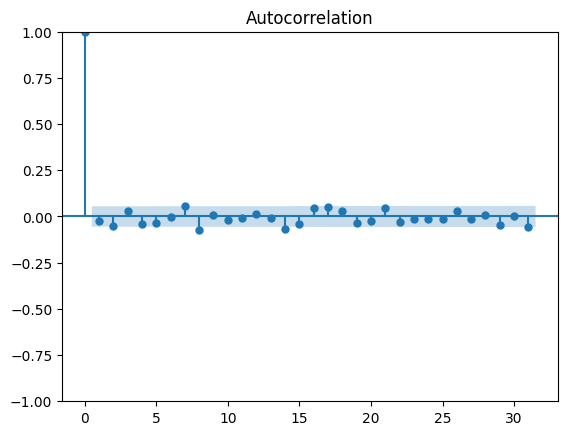

In [18]:
plot_acf(tickerdf.difference)

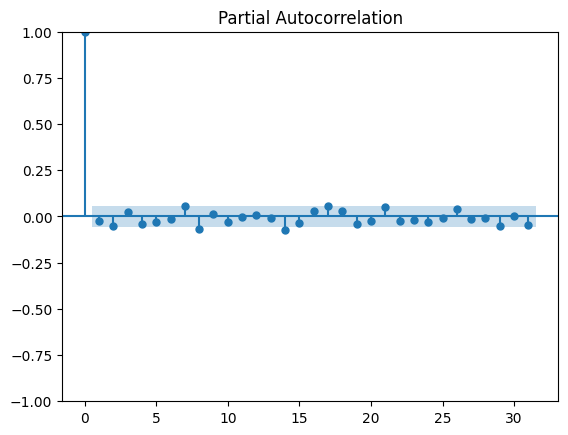

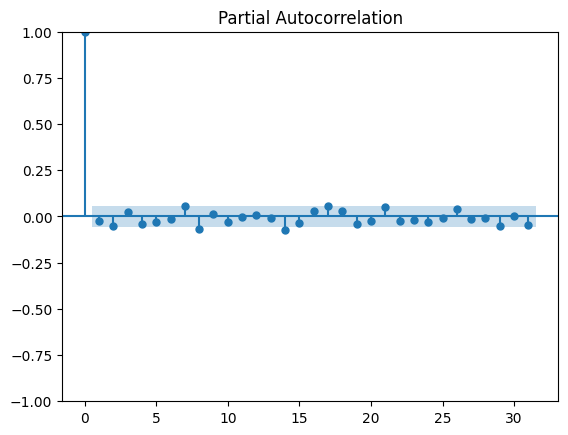

In [19]:
plot_pacf(tickerdf.difference)

In [20]:
from datetime import datetime, timedelta
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)

train_data = df[:train_end]
test_end = df[train_end + timedelta(days=1):test_end]
test_end

In [26]:
model = ARMA(train_data, order=(3,0))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
